## 1. Whole Foods locations from website
<p>Amazon as the online retail giant, is planning to expand its Whole Foods Market portfolio by adding more stores to include more customers within delivery service range. To do these expandings we need to know where the current Whole Foods stores are (and are not) located. </p>
<p>In this notebook, the <code>leaflet</code> package in R and data from <a href="https://www.wholefoodsmarket.com/stores/list">wholefoodsmarket</a> are used to find potential locations for new Whole Foods locations. </p>
<p>First I wrote a python script to scrap data from the wholefoodsmarket webpage. Then I will build several <code>leaflet</code> maps that I can use to explore the data and to see where I might recommend opening a Whole Foods.</p>
<p><img src="https://www.meatpoultry.com/ext/resources/images/w/h/o/l/e/d/e/d/d/d/6/WholeFoodsAmazon_Embedded.jpg" alt="logo"></p>

In [4]:
# Load tidyverse, leaflet, and leaflet.extras
library(tidyverse)
library(leaflet)
library(leaflet.extras)
library(sf)

# Read datasets/whole_foods.csv into a tibble named whole_foods using read_csv
whole_foods <- read_csv('/home/qsun/whole_foods.csv')

# Print out the whole_foods tibble using the head function

head(whole_foods)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  lat = col_double(),
  lon = col_double(),
  adder = col_character(),
  state = col_character(),
  zipcode = col_character()
)


X1,lat,lon,adder,state,zipcode
0,38.9118,-94.6608,119th Stn 6621 West 119th Street Overland Park,KS,66209-2020
1,36.1049,-95.9732,Brooksiden 1401 East 41st Street Tulsa,OK,74105
2,29.9207,-90.1178,Arabella Stationn 5600 Magazine Street New Orleans,LA,70115
3,30.2196,-97.8416,Arbor Trailsn 4301 W. William Cannon Austin,TX,78749
4,35.1464,-106.5560,Academyn 5815 Wyoming Blvd NE Albuquerque,NM,87109
5,38.5967,-121.3640,Sacramenton 4315 Arden Way Sacramento,CA,95864


## 2. Where are there Whole Foods?
<p>Where's the closest Whole Foods? 
By mapping all of the Whole Foods locations on an interactive <code>leaflet</code> map we can start to explore patterns in the geographic distribution of the chain's locations. </p>
<p>Since there are hundreds of store locations, we can plot all of the locations to see exactly where the stores are located. 


In [9]:
# Create a leaflet map of all closed Whole foods stores in North America

whole_foods_map <- whole_foods %>%

  leaflet() %>% 
  # Use addTiles to plot the stores on the default Open Street Map tile
  addTiles() %>%
  # Plot the closed stores using addCircles
  addCircles(color='blue') 

# Print map of locations
whole_foods_map

Assuming "lon" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

## 3. Which States have the fewest Whole Foods?


<p>Let's take a closer look at where there are not Whole Foods stores by quantifying the Whole Foods deserts using <code>dplyr</code> to count the number of locations in each US state. </p>

In [51]:
# Create a new tibble called whole_foods_by_state to store the results
# Print the state.abb vector

print(state.abb)

whole_foods_by_state <- 
whole_foods %>% 
# Filter the data to only whole_foods in the United States
  filter(state %in% state.abb | state=='DC') %>% 
  # Count the number of stores in whole_foods by state
  count(state) %>% 
  # Arrange the number of stores by state in ascending order
  arrange(n)

# Print the state counts
head(whole_foods_by_state)
#nrow(whole_foods_by_state)

# Use the %in% operator to determine which states are in whole_foods_by_state
state.abb %in% whole_foods_by_state$state

# Use the %in% and ! operators to determine which states are not in whole_foods_by_state
!state.abb %in% whole_foods_by_state$state


# Create a states_wo_whole_foods vector
states_wo_whole_foods <- state.abb[!state.abb %in% whole_foods_by_state$state]
# Create a zero vector with length of states_wo_whole_foods
num_state <- list(rep(0, length(states_wo_whole_foods)))

# Print states without whole_foods
states_wo_whole_foods

# combine list of states name without whole foods and zero vector
state_num <- data.frame(states_wo_whole_foods,num_state)
names(state_num) <- c('state','n')
# get all the states with corresponding number of stores including DC
state_combined <- rbind(state_num,whole_foods_by_state)
nrow(state_combined)




 [1] "AL" "AK" "AZ" "AR" "CA" "CO" "CT" "DE" "FL" "GA" "HI" "ID" "IL" "IN" "IA"
[16] "KS" "KY" "LA" "ME" "MD" "MA" "MI" "MN" "MS" "MO" "MT" "NE" "NV" "NH" "NJ"
[31] "NM" "NY" "NC" "ND" "OH" "OK" "OR" "PA" "RI" "SC" "SD" "TN" "TX" "UT" "VT"
[46] "VA" "WA" "WV" "WI" "WY"


state,n
IA,1
ID,1
ME,1
MS,1
AR,2
KY,2


[1]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[49]  TRUE FALSE

[1] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[37] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[49] FALSE  TRUE

[1] "AK" "DE" "MT" "ND" "SD" "VT" "WV" "WY"

[1] 51

Joining, by = "region"


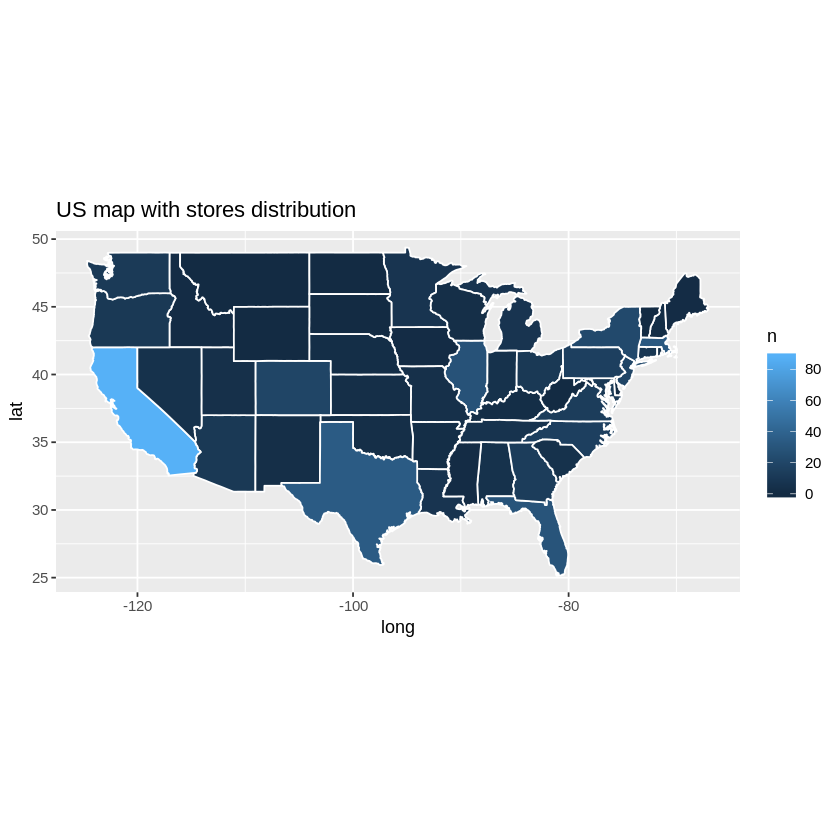

In [65]:
library(ggplot2)
library(dplyr)
library(openintro)


# rename the data frame to have the same column name with map_data
names(state_combined) <- c('region','n')
#head(state_combined)

#merge out data with map_data by region column 
choro <- left_join(
  map_data("state"), 
  state_combined %>% 
    # change the abbr state name to full name
    mutate(region=tolower(abbr2state(region)))
)

#plot out the US map with number of stores as the filled color
ggplot(choro, aes(long, lat)) +
  geom_polygon(aes(group = group, fill = n),colour = "white") +  
  coord_quickmap() +
  ggtitle('US map with stores distribution ')

## 3. Where to open new Whole Foods stores?

<p>First, let's focus on the only states in the United States that does not have a Whole Foods: 'AK' 'DE' 'MT' 'ND' 'SD' 'VT' 'WV' 'WY'. If we were to open a Whole Foods location in these sates, how might we select possible locations? we will look at how the population is distributed across the states using data from the US Census by mapping out the population and find cities with large population. </p>

<p>Second, we draw circles around each proposed location to estimate the population covered by each location and how close they are to the nearest open location. </p>

<p>Third, for existing locations, we will calculate how many people served by each store and find the possibility to add a one or more nearby. </p>
<p>Fourth, we could map out the competitors’ locations and overlap with Whole Foods, which will indicate where is the potential location for next store.
</p>
